## Double Well


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import wandb
import tensorflow as tf
from gpflow.likelihoods import Gaussian
from gpflow.config import default_float

from docs.sde.sde_exp_utils import generate_dw_data
from docs.sde.t_vgp_trainer import tVGPTrainer

2022-08-26 14:11:13.832580: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-26 14:11:13.832619: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-08-26 14:11:16.105600: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-08-26 14:11:16.106803: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-08-26 14:11:16.132391: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2022-08-26 14:11:16.132457: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: verma
2022-08-26 14:11:16.132469: I tensorflow/stream_execut

In [2]:
os.environ['WANDB_MODE'] = 'offline'
wandb.init()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


In [14]:
seed = 20
tf.random.set_seed(seed)
np.random.seed(seed)

DTYPE = default_float()

In [15]:
t0 = 0
t1 = 30
simulation_dt = 0.01
noise_stddev = 0.005
n_observations = 20
x0 = 1.0

q = 1.5 * tf.ones((1, 1), dtype=DTYPE)


In [16]:
simulated_values, observation_grid, latent_process, time_grid, _, _, sde = generate_dw_data(q, x0, t0, t1, 
                                                                                            simulation_dt,
                                                                                            noise_stddev, 
                                                                                            n_observations)

In [17]:
obs_val = tf.reshape(simulated_values, (-1, 1))

observations = (observation_grid, obs_val)
likelihood = Gaussian(variance=noise_stddev**2)

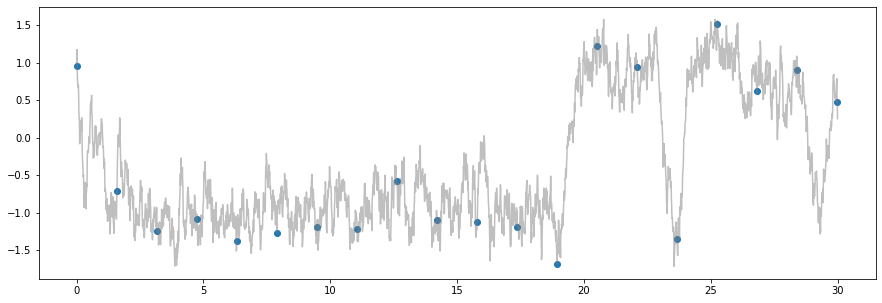

In [18]:
plt.subplots(1, 1, figsize=(15, 5))

plt.scatter(observations[0].numpy().reshape(-1), observations[1].numpy().reshape(-1))
plt.plot(time_grid.numpy().reshape(-1), latent_process.numpy().reshape(-1),color="gray", alpha=0.5)

plt.show()

In [19]:
t_vgp_trainer_all_sites = tVGPTrainer(observations, likelihood, time_grid, sde, data_sites_lr=0.4, 
                                      update_all_sites=True, all_sites_lr=0.5)
t_vgp_trainer_all_sites.run()

t-VGP: Starting ELBO -885472.1842816349;
t-VGP: ELBO = -503.46520601793526
t-VGP: ELBO = -357.4124908960473
t-VGP: ELBO = -257.6348804210693
t-VGP: ELBO = -190.63358191967222
t-VGP: ELBO = -148.1185095244181
t-VGP: ELBO = -122.48329082641501
t-VGP: ELBO = -106.61834477625514
t-VGP: ELBO = -95.71491703454609
t-VGP: ELBO = -87.4331327184165
t-VGP: ELBO = -81.57664136685882
t-VGP: ELBO = -77.95577466491713
t-VGP: ELBO = -75.91343124661529
t-VGP: ELBO = -74.70821480818171
t-VGP: ELBO = -73.85878602134697
t-VGP: ELBO = -73.19109704266404
t-VGP: ELBO = -72.64364287033338
t-VGP: ELBO = -72.18605450332977
t-VGP: ELBO = -71.78515918213577
t-VGP: ELBO = -71.42565486816049
t-VGP: ELBO = -71.09202065582569
t-VGP: ELBO = -70.77964341301362
t-VGP: ELBO = -70.4811884285552
t-VGP: ELBO = -70.19552560824849
t-VGP: ELBO = -69.9189725209437
t-VGP: ELBO = -69.65140121464489
t-VGP: ELBO = -69.39073179458441
t-VGP: ELBO = -69.13695072635508
t-VGP: ELBO = -68.888744663229
t-VGP: ELBO = -68.64600630225422
t-V

([-885472.1842816349,
  -503.46520601793526,
  -357.4124908960473,
  -257.6348804210693,
  -190.63358191967222,
  -148.1185095244181,
  -122.48329082641501,
  -106.61834477625514,
  -95.71491703454609,
  -87.4331327184165,
  -81.57664136685882,
  -77.95577466491713,
  -75.91343124661529,
  -74.70821480818171,
  -73.85878602134697,
  -73.19109704266404,
  -72.64364287033338,
  -72.18605450332977,
  -71.78515918213577,
  -71.42565486816049,
  -71.09202065582569,
  -70.77964341301362,
  -70.4811884285552,
  -70.19552560824849,
  -69.9189725209437,
  -69.65140121464489,
  -69.39073179458441,
  -69.13695072635508,
  -68.888744663229,
  -68.64600630225422,
  -68.40782221141487,
  -68.1739814773169,
  -67.94380403240771,
  -67.7170200326274,
  -67.49310443483598,
  -67.27177396394192,
  -67.05261870518142,
  -66.83537471674387,
  -66.6197254712645,
  -66.40544715994028,
  -66.19230469863706,
  -65.98012702168305,
  -65.768754186613,
  -65.55807520974945,
  -65.34800176687604,
  -65.1384863297

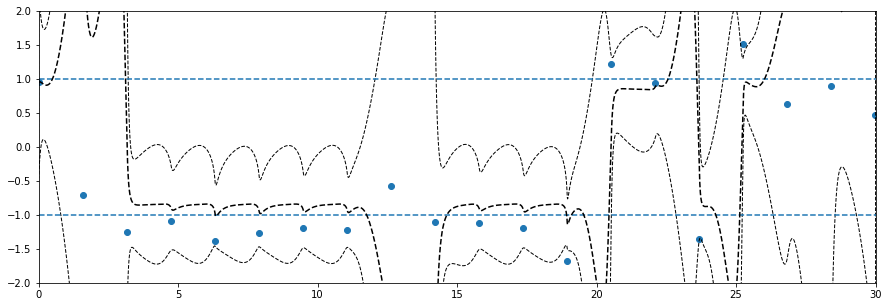

In [20]:
# Linearized prior
lin_m, lin_S = t_vgp_trainer_all_sites.tvgp_model.dist_p_ssm.marginals
lin_m = lin_m.numpy().reshape(-1)
lin_S_std = np.sqrt(lin_S.numpy()).reshape(-1)

# Plotting
plt.subplots(1, 1, figsize=(15, 5))
plt.scatter(observations[0].numpy().reshape(-1), observations[1].numpy().reshape(-1))
plt.fill_between(
    time_grid,
    y1=(lin_m.reshape(-1) - 2 * lin_S_std.reshape(-1)).reshape(-1, ),
    y2=(lin_m.reshape(-1) + 2 * lin_S_std.reshape(-1)).reshape(-1, ),
    edgecolor="black",
    facecolor=(0, 0, 0, 0.),
    linestyle='dashed'
)
plt.hlines(1., t0, t1, linestyles="dashed")
plt.hlines(-1., t0, t1, linestyles="dashed")

# plt.vlines(time_grid.numpy().reshape(-1), -2, 2, linestyle="dashed", color="gray")

plt.plot(time_grid.numpy().reshape(-1), lin_m.reshape(-1), color="black", linestyle="dashed")

plt.ylim([-2, 2])
plt.xlim([t0, t1])
plt.show()

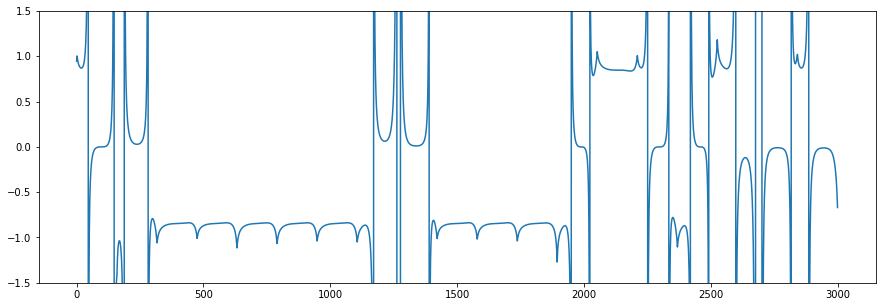

In [21]:
b = t_vgp_trainer_all_sites.tvgp_model.dist_p_ssm.state_offsets / simulation_dt
A = (t_vgp_trainer_all_sites.tvgp_model.dist_p_ssm.state_transitions - tf.eye(1, dtype=b.dtype)) / simulation_dt

A = A.numpy().reshape(-1)
b = b.numpy().reshape(-1)

plt.subplots(1, 1, figsize=(15, 5))
c = -b/A
plt.plot(c)
plt.ylim([-1.5, 1.5])
plt.show()

In [23]:
from markovflow.models.vi_sde import VariationalMarkovGP
vgp_model = VariationalMarkovGP(observations, sde, time_grid, likelihood, lr=0.0001, initial_state_lr=0.001,
                                    convergence_tol=1e-4)

# Initialize VGP model
vgp_model.q_initial_cov = 0.5 + 0. * vgp_model.q_initial_cov
vgp_model.q_initial_mean = observations[1][0] + 0. * vgp_model.q_initial_mean
vgp_model.p_initial_mean = observations[1][0] + 0. * vgp_model.p_initial_mean
vgp_model.p_initial_cov = 0.5 + 0. * vgp_model.p_initial_cov

vgp_elbo_vals, _, _ = vgp_model.run(update_prior=False, update_initial_statistics=True)


VGP: Starting ELBO -798910.9805216036
VGP - q loop: ELBO -72899.5425110179
VGP - q loop: ELBO -44068.50028969362
VGP - q loop: ELBO -32195.416574019397
VGP - q loop: ELBO -25452.632541514395
VGP - q loop: ELBO -21037.840988535805
VGP - q loop: ELBO -17907.01141697579
VGP - q loop: ELBO -15569.662582159937
VGP - q loop: ELBO -13759.863650607222
VGP - q loop: ELBO -12319.106153189936
VGP - q loop: ELBO -11146.837282537772
VGP - q loop: ELBO -10177.000990103303
VGP - q loop: ELBO -9366.154382010409
VGP - q loop: ELBO -8687.612293636515
VGP - q loop: ELBO -8129.726548960712
VGP - q loop: ELBO -7699.127032341784
VGP - q loop: ELBO -7435.940893251015
VGP - q loop: ELBO -7478.131004227498
VGP: q loop ELBO decreasing!!! Decaying LR!
VGP - q loop: ELBO -7771.383585129112
VGP: q loop ELBO decreasing!!! Decaying LR!
VGP - q loop: ELBO -8092.401869820825
VGP: q loop ELBO decreasing!!! Decaying LR!
VGP - q loop: ELBO -8342.418807708927
VGP: q loop ELBO decreasing!!! Decaying LR!
VGP - x0 loop: ELBO

In [24]:
m_vgp, S_vgp = vgp_model.forward_pass
m_vgp = m_vgp.numpy().reshape(-1)
S_std_vgp = np.sqrt(S_vgp.numpy()).reshape(-1)

m, S = t_vgp_trainer_all_sites.tvgp_model.dist_q.marginals
m = m.numpy().reshape(-1)
S_std = np.sqrt(S.numpy()).reshape(-1)

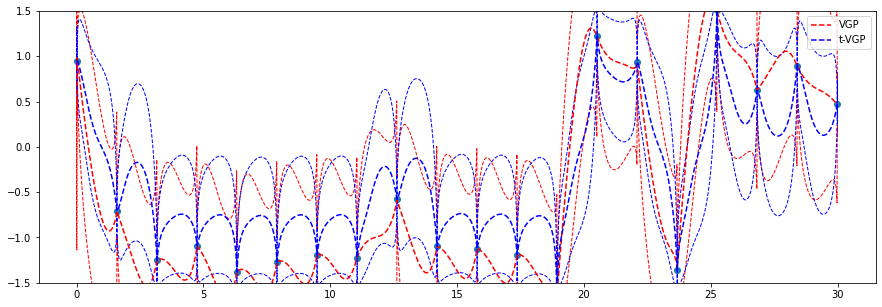

In [25]:
plt.subplots(1, 1, figsize=(15, 5))

plt.scatter(observations[0].numpy().reshape(-1), observations[1].numpy().reshape(-1))
plt.fill_between(
    time_grid,
    y1=(m_vgp.reshape(-1) - 2 * S_std_vgp.reshape(-1)).reshape(-1, ),
    y2=(m_vgp.reshape(-1) + 2 * S_std_vgp.reshape(-1)).reshape(-1, ),
    edgecolor="red",
    facecolor=(0, 0, 0, 0.),
    linestyle='dashed'
)

plt.plot(time_grid.numpy().reshape(-1), m_vgp.reshape(-1), color="red", linestyle="dashed", label="VGP")


plt.fill_between(
    time_grid,
    y1=(m.reshape(-1) - 2 * S_std.reshape(-1)).reshape(-1, ),
    y2=(m.reshape(-1) + 2 * S_std.reshape(-1)).reshape(-1, ),
    edgecolor="blue",
    facecolor=(0, 0, 0, 0.),
    linestyle='dashed'
)

plt.plot(time_grid.numpy().reshape(-1), m.reshape(-1), color="blue", linestyle="dashed", label="t-VGP")


plt.ylim([-1.5, 1.5])
plt.legend()
plt.show()
